# Generation per Plant — ENTSO-E Examples

Querying actual generation at individual generator level (document type A73).

**Note:** Only generation units with ≥100 MW installed capacity are required to report.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from entsoe import Client, country_name

client = Client()

## 1. All Generation Units — France (1 day)

In [2]:
start = "2024-06-03"
end = "2024-06-04"

df = client.generation.per_plant(start, end, country="FR")
df.head(10)

,timestamp,value,psr_type,unit_eic,unit_name,quantity_unit
0,2024-06-02 22:00:00+00:00,857.0,Nuclear,17W100P100P0108P,CHINON 3,MAW
1,2024-06-02 22:00:00+00:00,707.0,Nuclear,17W100P100P00958,BLAYAIS 4,MAW
2,2024-06-02 22:00:00+00:00,167.0,Hydro Pumped Storage,17W100P100P20746,COCHE 5,MAW
3,2024-06-02 22:00:00+00:00,41.0,Nuclear,17W100P100P0140T,PALUEL 2,MAW
4,2024-06-02 22:00:00+00:00,900.0,Nuclear,17W100P100P00966,BUGEY 2,MAW
5,2024-06-02 22:00:00+00:00,1.0,Nuclear,17W100P100P0141R,PALUEL 3,MAW
6,2024-06-02 22:00:00+00:00,29.0,Nuclear,17W100P100P0149B,TRICASTIN 1,MAW
7,2024-06-02 22:00:00+00:00,22.0,Nuclear,17W100P100P0150Q,TRICASTIN 2,MAW
8,2024-06-02 22:00:00+00:00,4.0,Nuclear,17W100P100P0153K,TRICASTIN 4,MAW
9,2024-06-02 22:00:00+00:00,1.0,Fossil Gas,17W100P100P0173E,BLENOD 5,MAW


In [3]:
print(f"Columns: {df.columns.tolist()}")
print(f"Unique units: {df['unit_name'].nunique()}")
print(f"Fuel types: {df['psr_type'].nunique()}")
print(f"Time range: {df['timestamp'].min()} → {df['timestamp'].max()}")

Columns: ['timestamp', 'value', 'psr_type', 'unit_eic', 'unit_name', 'quantity_unit']
Unique units: 144
Fuel types: 10
Time range: 2024-06-02 22:00:00+00:00 → 2024-06-03 21:00:00+00:00


## 2. Top 10 Generators by Output

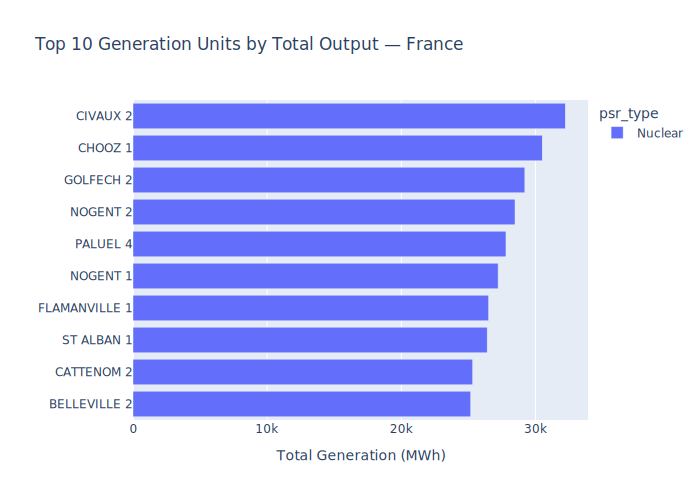

In [4]:
totals = (
    df.groupby(["unit_name", "psr_type"])["value"]
    .sum()
    .reset_index()
    .sort_values("value", ascending=False)
    .head(10)
)

fig = px.bar(
    totals, x="value", y="unit_name", color="psr_type",
    orientation="h",
    title="Top 10 Generation Units by Total Output — France",
    labels={"value": "Total Generation (MWh)", "unit_name": ""},
)
fig.update_layout(yaxis={"categoryorder": "total ascending"})
fig.show()

## 3. Nuclear Plants — Hourly Profiles

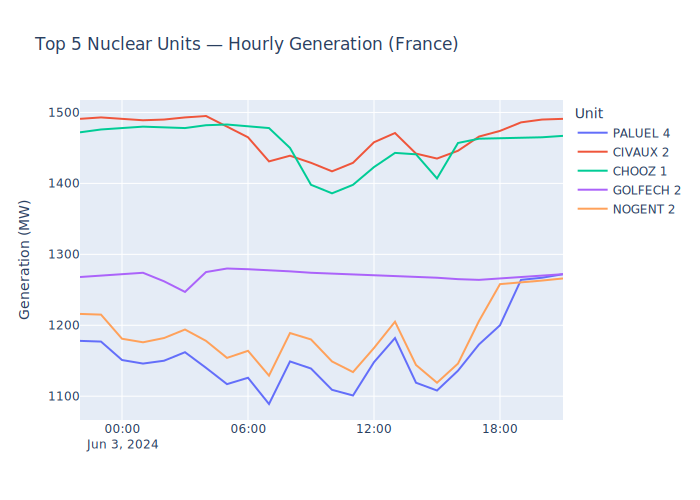

In [5]:
df_nuclear = df[df["psr_type"] == "Nuclear"].copy()

# Pick top 5 nuclear units by total output
top_nuclear = (
    df_nuclear.groupby("unit_name")["value"].sum()
    .nlargest(5).index
)
df_top = df_nuclear[df_nuclear["unit_name"].isin(top_nuclear)]

fig = px.line(
    df_top, x="timestamp", y="value", color="unit_name",
    title="Top 5 Nuclear Units — Hourly Generation (France)",
    labels={"value": "Generation (MW)", "timestamp": "", "unit_name": "Unit"},
)
fig.show()

## 4. Gas Plants — France

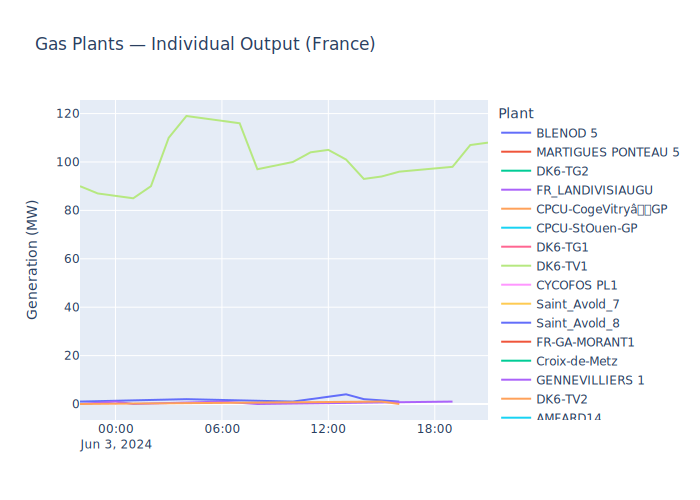

In [6]:
df_gas = df[df["psr_type"] == "Fossil Gas"].copy()

fig = px.line(
    df_gas, x="timestamp", y="value", color="unit_name",
    title="Gas Plants — Individual Output (France)",
    labels={"value": "Generation (MW)", "timestamp": "", "unit_name": "Plant"},
)
fig.show()

## 5. Unit Count by Fuel Type

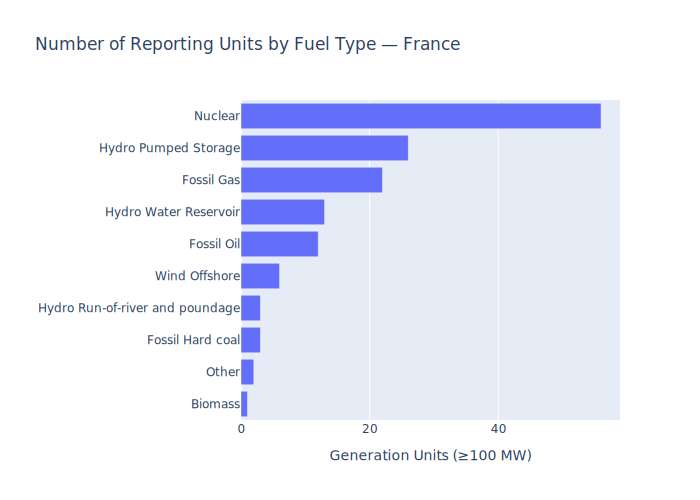

In [7]:
unit_counts = (
    df.groupby("psr_type")["unit_name"]
    .nunique()
    .reset_index(name="units")
    .sort_values("units", ascending=True)
)

fig = px.bar(
    unit_counts, x="units", y="psr_type", orientation="h",
    title="Number of Reporting Units by Fuel Type — France",
    labels={"units": "Generation Units (≥100 MW)", "psr_type": ""},
)
fig.show()